In this notebook we will train a very simple 3-layer neural network to classify the Fashion-MNIST datset. The dataset consists images that are to be classified into 10 different categories.[More Info](https://www.kaggle.com/zalando-research/fashionmnist)

We will use a 3-layer neural network. The first layer being just input layer with 784 neurons(The images are 28x28 pixels), the second layer consist of 264 layers and the final layer consist of 10 neurons. The final layer gives the prediction of our model. A softmax function can be used at the final layer so the the final layer looks like a probability
of occurence of certain category in range of 0 and 1.


First Let's import all necessary packages and set the seed to 0.
Setting seed to a number will force numpy to generate same random number pattern every time.

In [17]:
import numpy as np

np.random.seed(0) # set the seed to choose exact random values
import pandas as pd
import matplotlib.pyplot as plt

The training set consist of 785 columns, the first one being the label and rest 784 are input pixels.

In [18]:
dataframe = pd.read_csv("fashion-mnist_train.csv")

display(dataframe[:10])



,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


Let's split the training set into train and test set. A separate test dataset is provided but we can split this
training set for a quick experiment

In [19]:
data = dataframe.values[:10000]

labels = data[:, 0]
images = data[:, 1:]

images = images/255

train_test_split = 0.6
train_test_split_index = int(len(images) * train_test_split)
training_images = images[:train_test_split_index]
testing_images = images[train_test_split_index: ]


The output of the model will be a vector of size (1,10), so let's one-hot encode the label where the index of label
will be 1 and rest of them will be 0.

i.e if label is 2, the one-hot label will be [0 0 1 0 0 0 0 0 0 0]

In [20]:
one_hot_labels = []
for label in labels:
    base_label = np.zeros(10)
    base_label[int(label)] = 1
    one_hot_labels.append(base_label)

labels = one_hot_labels
training_labels = labels[:train_test_split_index]
testing_labels = labels[train_test_split_index: ]

assert(len(training_images) == len(training_labels))
assert(len(testing_images) == len(testing_labels))

print(len(training_images))
print(len(testing_images))

6000
4000


A simple helper dictionary to map the index to label name. 0 will be t-shirt, 1 will be trousers and so on.

In [21]:
index_to_label_name = {
    0: "t-shirt", 1: "trousers", 2: "pullover", 3: "dress", 4: "coat", 5: "sandal", 6: "shirt", 7: "sneaker",
    8: "bag", 9: "ankle boot"
}


Let's view a single sample image and its label

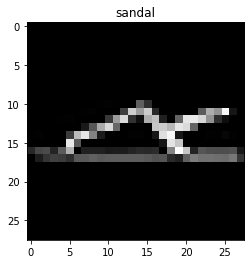

In [22]:
sample_image = training_images[7]
sample_label = index_to_label_name[np.argmax(training_labels[7])]
plt.title(sample_label)
plt.imshow(sample_image.reshape(28,28), cmap="gray")

Now we will define our hidden and output layer size. Also we will initialize our weights with some random values.

In [23]:
input_size = images.shape[1]
hidden_size = 264
output_size = 10

weights_input_hidden = 0.2 * np.random.random((input_size, hidden_size)) - 0.1
print(weights_input_hidden.shape)
weights_hidden_output = 0.2 * np.random.random((hidden_size, output_size)) - 0.1
print(weights_hidden_output.shape)

def relu(x):
    return (x>=0) * x # returns x if x>=0, else 0

def relu2deriv(x):
    return x>=0
print(images[0].shape)



(784, 264)
(264, 10)
(784,)


Now we will train our model. Much have been said in previous notebook and [blog post](https://nischal.info.np/very-stupid-introduction-to-deep-learning)

In [10]:
num_iterations = 108
alpha = 0.001
correct = 0

training_error_list = []
testing_error_list = []

for itera in range(num_iterations):
    train_error = 0
    train_correct = 0
    for idx in range(len(training_images)):
        
        
        image = training_images[idx]
        label = training_labels[idx]
        
        layer_0 = image # input layer just takes input

        layer_1 = relu(layer_0.dot(weights_input_hidden))

        layer_2 = layer_1.dot(weights_hidden_output)
        
        train_correct = train_correct + int(np.argmax(layer_2) == np.argmax(label))
        train_error = train_error + np.sum((layer_2 - label) ** 2)
        
        layer_2_delta = layer_2 - label
        layer_1_delta = layer_2_delta.dot(weights_hidden_output.T) * relu2deriv(layer_1)
        
        weights_hidden_output = weights_hidden_output - alpha * layer_1.reshape(264,1).dot(layer_2_delta.reshape(1,10))
        weights_input_hidden = weights_input_hidden - alpha * layer_0.reshape(784, 1).dot(layer_1_delta.reshape(1,264))
    
    
        

    
     
    test_error = 0
    test_correct = 0

    for i in range(len(testing_images)):


        image = testing_images[i]
        label = testing_labels[i]
        layer_0 = image # input layer just takes input

        layer_1 = relu(layer_0.dot(weights_input_hidden))
        layer_2 = layer_1.dot(weights_hidden_output)

        test_correct = test_correct + int(np.argmax(layer_2) == np.argmax(label))

        test_error = test_error + np.sum((layer_2 - label) ** 2)


    
    ## Print only 9th iteration
    if itera % 9 == 0:

        print("Iter: {} Train Error: {:.3f} Accuracy: {:.3f}%"
              .format(itera, train_error/len(training_images), train_correct/len(training_images) * 100))

        print("Iter: {} Test Error: {:.3f} Accuracy: {:.3f}%"
              .format(itera, test_error/len(testing_images), test_correct/len(testing_images) * 100))
    
    
    training_error_list.append(train_error/len(training_images))
    testing_error_list.append(test_error/len(testing_images))

        

Iter: 0 Train Error: 0.663 Accuracy: 64.367%
Iter: 0 Test Error: 0.531 Accuracy: 74.125%
Iter: 9 Train Error: 0.340 Accuracy: 83.150%
Iter: 9 Test Error: 0.371 Accuracy: 81.400%
Iter: 18 Train Error: 0.309 Accuracy: 84.467%
Iter: 18 Test Error: 0.350 Accuracy: 82.325%
Iter: 27 Train Error: 0.294 Accuracy: 85.350%
Iter: 27 Test Error: 0.341 Accuracy: 82.800%
Iter: 36 Train Error: 0.283 Accuracy: 85.933%
Iter: 36 Test Error: 0.337 Accuracy: 83.025%
Iter: 45 Train Error: 0.276 Accuracy: 86.717%
Iter: 45 Test Error: 0.335 Accuracy: 82.750%
Iter: 54 Train Error: 0.270 Accuracy: 87.217%
Iter: 54 Test Error: 0.334 Accuracy: 82.725%
Iter: 63 Train Error: 0.266 Accuracy: 87.567%
Iter: 63 Test Error: 0.334 Accuracy: 82.650%
Iter: 72 Train Error: 0.263 Accuracy: 87.967%
Iter: 72 Test Error: 0.335 Accuracy: 82.600%
Iter: 81 Train Error: 0.261 Accuracy: 88.167%
Iter: 81 Test Error: 0.336 Accuracy: 82.575%
Iter: 90 Train Error: 0.259 Accuracy: 88.550%
Iter: 90 Test Error: 0.337 Accuracy: 82.500%
Ite

Let's visualize the training and testing loss, As we can see training loss is decreasing over time, but the testing
loss is not decreasing at the same rate. This is due to overfitting. We can use validation set, dropout to regularize our model.

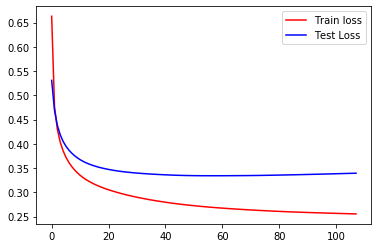

In [13]:
plt.plot(training_error_list, 'r', label="Train loss")
plt.plot(testing_error_list, 'b', label="Test Loss")
plt.legend()


Now Let's see how our model have done in a test set. We will pick some random images and output its predicion.

In [14]:
def predict(img, label):
    label = index_to_label_name[np.argmax(label)]
    layer_0 = img
    layer_1 = relu(layer_0.dot(weights_input_hidden))
    layer_2 = layer_1.dot(weights_hidden_output)
    predicted_label = index_to_label_name[np.argmax(layer_2)]
    
    img = img.reshape((28,28))
    plt.imshow(img, cmap="gray")
    plt.title("Predicted: {} Actual: {}".format(predicted_label, label))
    

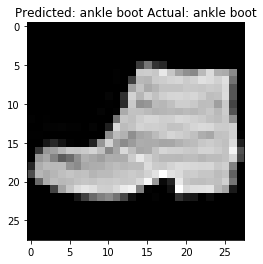

In [15]:
predict(testing_images[90], testing_labels[90])

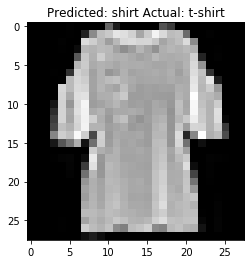

In [16]:
predict(testing_images[929], testing_labels[929])